# Titanic survived Project

**Project Description**
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

**Attribute Information**

Passenger id- Unique Id of the passenger

Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Survived- Survived (0 = No; 1 = Yes)

Name- Name of the passenger

Sex- Sex of the passenger (Male, Female)

Age- Age of the passenger

Sibsp- Number of Siblings/Spouses Aboard

Parch- Number of Parents/Children Aboard

Ticket- Ticket Number

Fare- Passenger Fare (British pound)

Cabin- Cabin

Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

**1. Importing required Libraries**

In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

**2. Read Data**

In [284]:
df = pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


I have saved the raw data from Github link to csv and read the csv.

In [135]:
df.shape

(891, 12)

Titanic Dataset has 891 rows and 12 columns.

By analysig this data, We are trying topredict survival rate using the ML model. We have more than 2 catogorical variable present in the dataset. Therefore it is a classification problem and we will use various classification model to train and test the data to get the best prediction model for our dataset.

In [136]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [138]:
# We can see top 5 and bottom 5 rows

**3. EDA (Exploratory Data Analysis)**

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Fro above we can see some catogorical variables and numerical variable with datatype as integer.

In [140]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [141]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

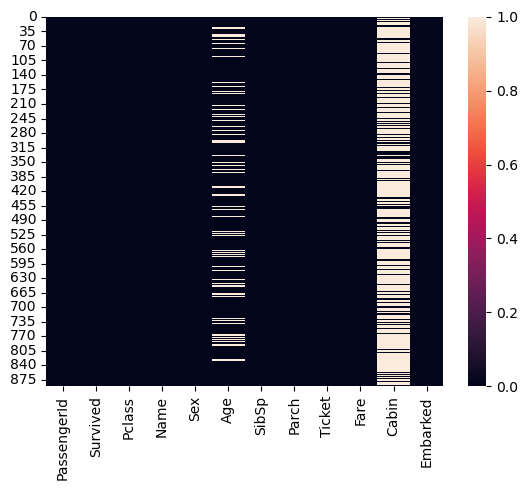

In [142]:
sns.heatmap(df.isnull())

From above heatmap, we can see null values present in the dataset for variables Age, Cabin, and Embark.

In [143]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Describe methos is used to determin mean, median, standard deviation, minimum, maximum, and interquantile range of the datasets.

From above data, we can see there is significant gap between the 75% and maximum of the variable, Passangeid, Age, SibSp, Parch, and Fare. So outliers are present within the datsets and we need to treat the outliers as per requirement.

**4. Visualisaton**

<Axes: xlabel='Sex', ylabel='Survived'>

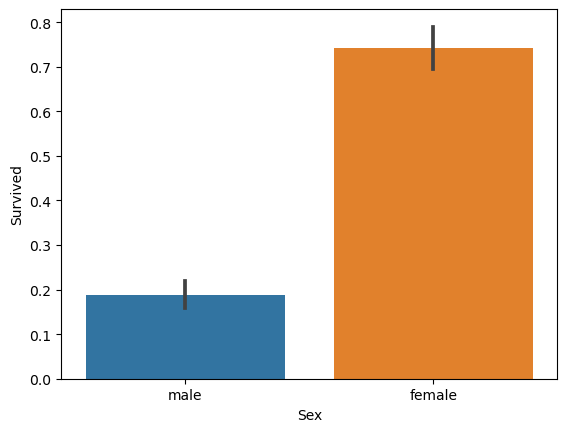

In [144]:
sns.barplot(x = df['Sex'], y = df['Survived'])

From above barplot, we can see the probability of survival rate for male with respec to female.

<Axes: xlabel='Pclass', ylabel='Survived'>

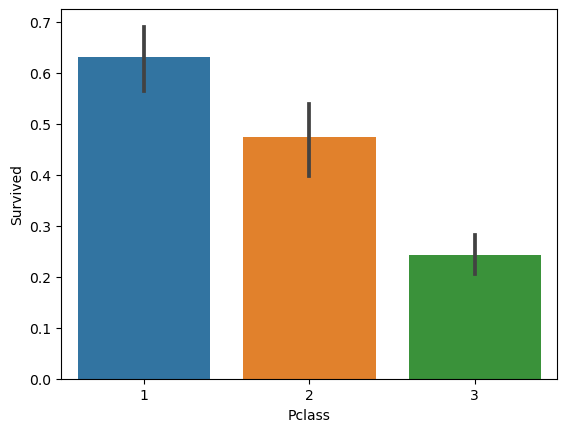

In [145]:
sns.barplot(x = df['Pclass'],y = df['Survived'])

<Axes: xlabel='Pclass', ylabel='Survived'>

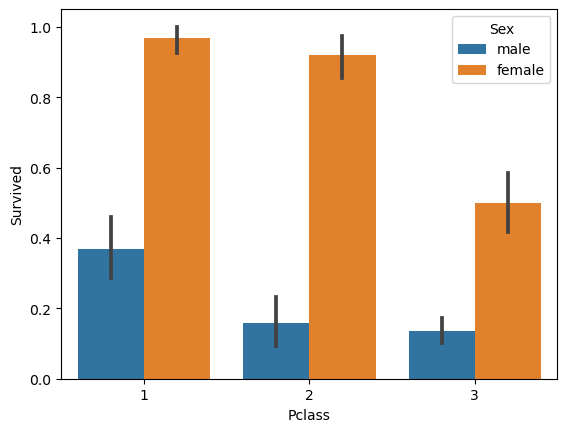

In [146]:
sns.barplot(x = df['Pclass'],y = df['Survived'], hue = df['Sex'])

<Axes: ylabel='Survived'>

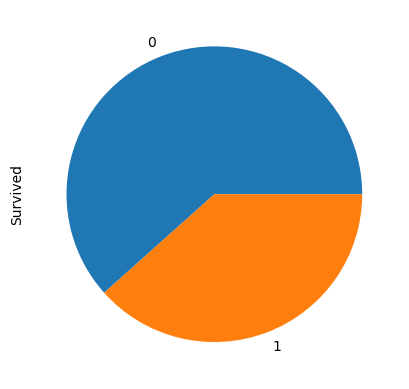

In [147]:
df['Survived'].value_counts().plot.pie()

In [148]:
df['Sex'].value_counts(), df['Survived'].value_counts()

(male      577
 female    314
 Name: Sex, dtype: int64,
 0    549
 1    342
 Name: Survived, dtype: int64)

<Axes: xlabel='Sex', ylabel='count'>

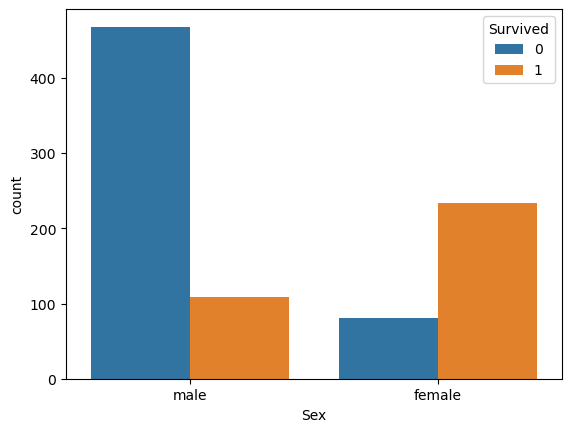

In [149]:
sns.countplot(data = df,x= 'Sex', hue = 'Survived')

In [150]:
pd.crosstab(df.Pclass,df.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [151]:
pd.crosstab(df.Sex,df.Survived, margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [152]:
pd.crosstab([df.Sex,df.Survived],df.Pclass, margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

Above countplot and crosstab indicates the no of male and female survived and not survived. So the no of female survived was more than the no of male survived.

Also, out of 891 people, only 342 were survived out of which 233 were female and 109 were female and the most of the survival from First class passangers. It clearly indicates that women survival were most.

PassengerId       Axes(0.125,0.653529;0.227941x0.226471)
Survived       Axes(0.398529,0.653529;0.227941x0.226471)
Pclass         Axes(0.672059,0.653529;0.227941x0.226471)
Age               Axes(0.125,0.381765;0.227941x0.226471)
SibSp          Axes(0.398529,0.381765;0.227941x0.226471)
Parch          Axes(0.672059,0.381765;0.227941x0.226471)
Fare                  Axes(0.125,0.11;0.227941x0.226471)
dtype: object

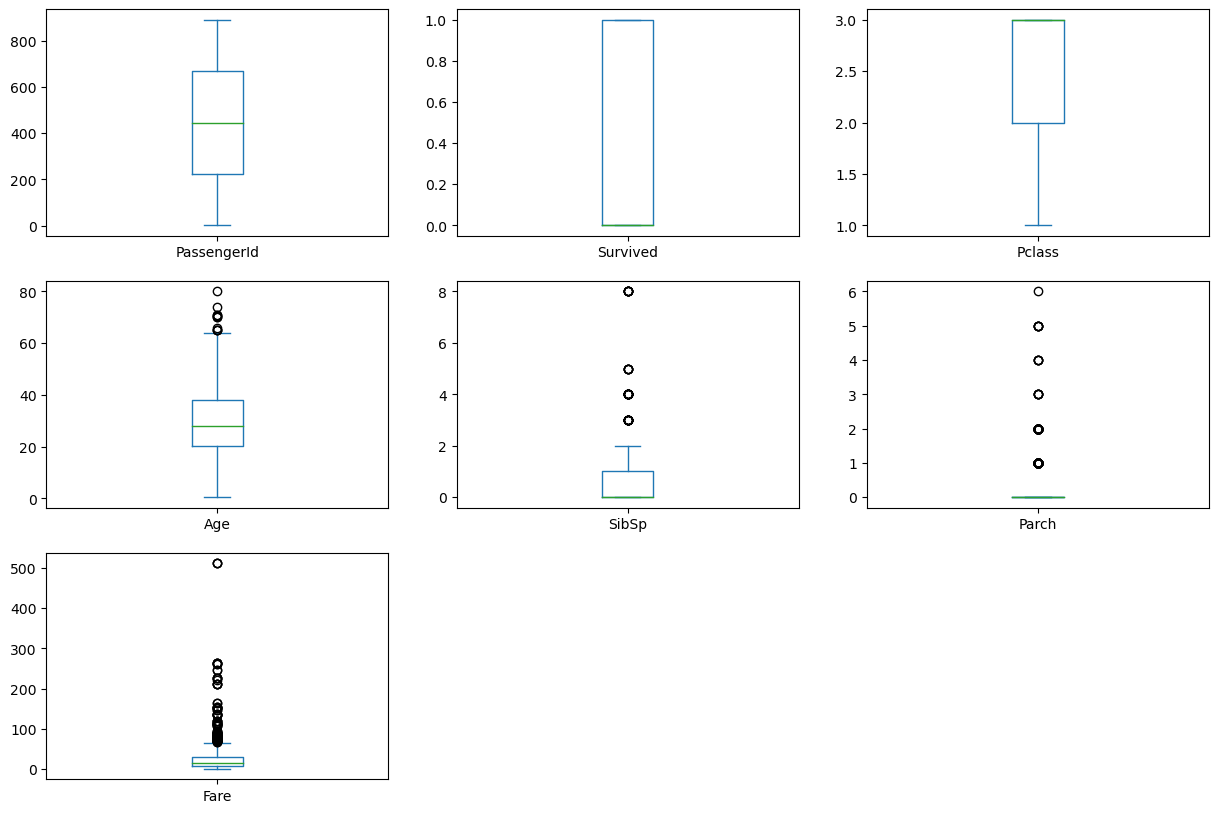

In [153]:
df.plot(kind = 'box', subplots = True, layout = (3,3), figsize = (15,10))

In [154]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

From above, we can see there are outliers and skewness present in the dataset.

In [299]:
df_test= df[['Survived','Pclass','Age','Sex','SibSp','Parch','Fare']]

<Axes: >

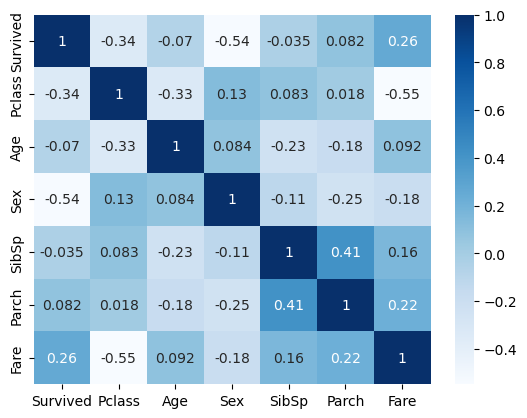

In [300]:
sns.heatmap(df_test.corr(), annot = True, cmap ='Blues')

In [157]:
# Fare is more correlated to the survived

In [158]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [159]:
mean = df['Age'].mean()

In [296]:
df['Age'].fillna(mean, inplace= True)

In [297]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin and Ticket columns are not related to our dependent variable 'Survived'. Hence we will drop the  these columns rom our dataset.

In [172]:
df.drop(['Cabin'], axis = 1, inplace = True)

In [174]:
df.drop(['Ticket'], axis = 1, inplace = True)

Text(0, 0.5, 'No of Passangers boarded')

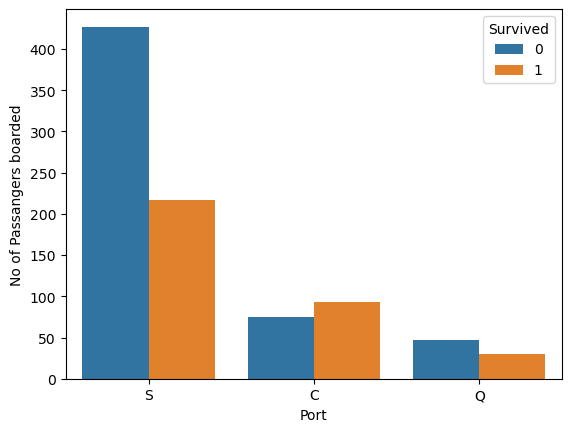

In [193]:
sns.countplot(x='Embarked', hue = 'Survived',data = df)
plt.xlabel('Port')
plt.ylabel('No of Passangers boarded')

Text(0, 0.5, 'No of Passangers boarded')

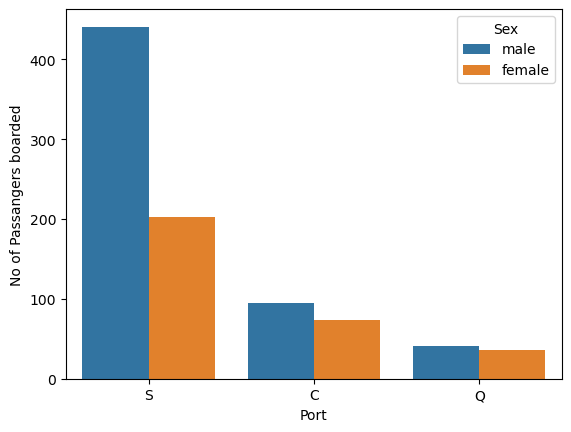

In [194]:
sns.countplot(x='Embarked', hue = 'Sex',data = df)
plt.xlabel('Port')
plt.ylabel('No of Passangers boarded')

Text(0, 0.5, 'No of Passangers boarded')

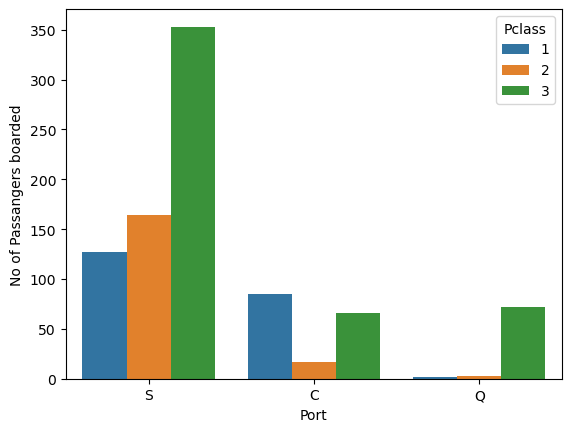

In [195]:
sns.countplot(x='Embarked', hue = 'Pclass',data = df)
plt.xlabel('Port')
plt.ylabel('No of Passangers boarded')

From above, we can see maximum passangers were boarded from S port and least from Q port. Passangers boarded from C port has good rate of survival.

<Axes: xlabel='SibSp', ylabel='Sex'>

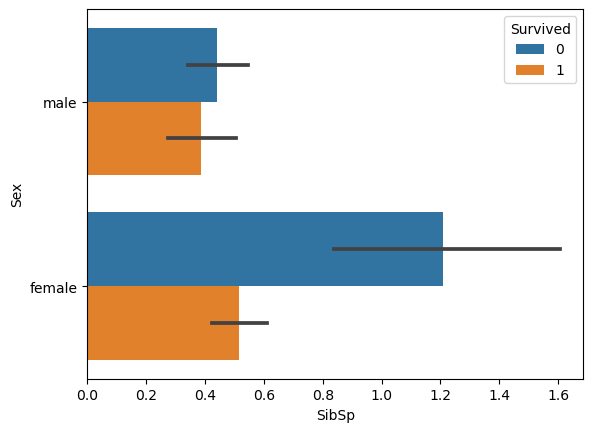

In [200]:
sns.barplot(data = df, x = 'SibSp',y='Sex',hue='Survived')

<Axes: xlabel='Parch', ylabel='Sex'>

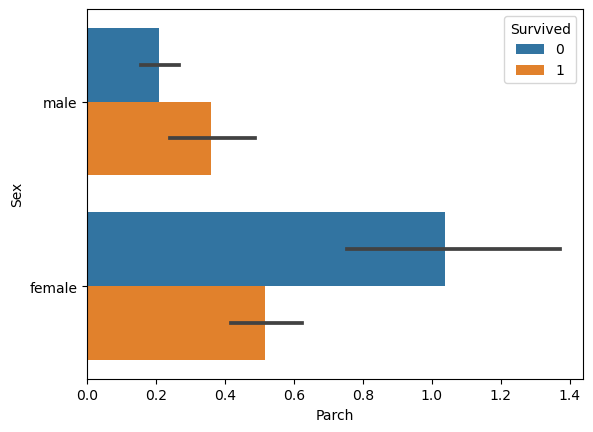

In [201]:
sns.barplot(data = df, x = 'Parch',y='Sex',hue='Survived')

From above graphs, we can say that, female siblings or spouse and female parents or children had more casulities.

<Axes: xlabel='Fare', ylabel='Density'>

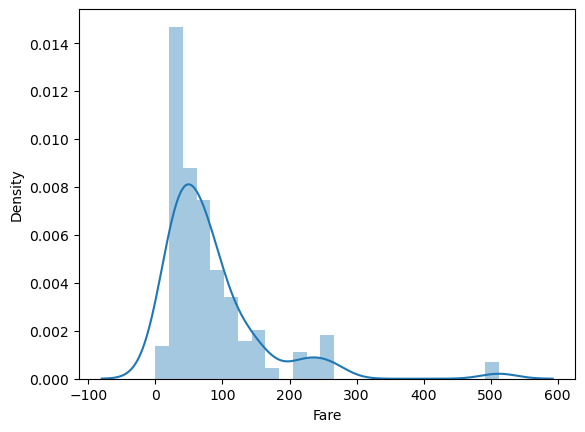

In [227]:
sns.distplot(df[df['Pclass']==1].Fare)

<Axes: xlabel='Fare', ylabel='Density'>

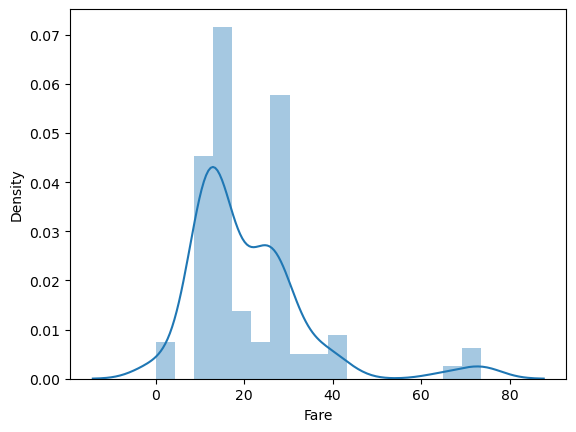

In [228]:
sns.distplot(df[df['Pclass']==2].Fare)

<Axes: xlabel='Fare', ylabel='Density'>

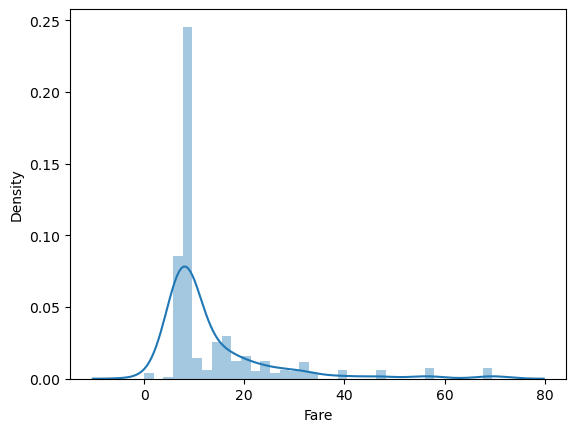

In [229]:
sns.distplot(df[df['Pclass']==3].Fare)

By comparing Fares, Class 1 has large fares as it is having large distribution.

We will transform Sex column to binary form using lael encoder

In [287]:
from sklearn.preprocessing import LabelEncoder

In [288]:
le = LabelEncoder()

In [289]:
df['Sex'] = le.fit_transform(df['Sex'])

<Axes: >

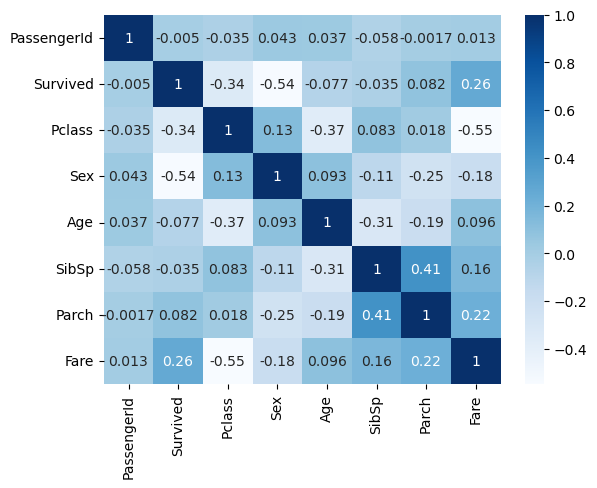

In [290]:
sns.heatmap(df.corr(), annot=True, cmap = 'Blues')

We will remove outliers from the dataset

In [293]:
df_test

,Survived,Pclass,Age,Sex,SibSp,Parch,Fare
0,0,3,22.0,1,1,0,7.2500
1,1,1,38.0,0,1,0,71.2833
2,1,3,26.0,0,0,0,7.9250
3,1,1,35.0,0,1,0,53.1000
4,0,3,35.0,1,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,27.0,1,0,0,13.0000
887,1,1,19.0,0,0,0,30.0000
888,0,3,NaN,0,1,2,23.4500
889,1,1,26.0,1,0,0,30.0000


In [302]:
z = np.abs(zscore(df_test))
z

,Survived,Pclass,Age,Sex,SibSp,Parch,Fare
0,0.789272,0.827377,0.592481,0.737695,0.432793,0.473674,0.502445
1,1.266990,1.566107,0.638789,1.355574,0.432793,0.473674,0.786845
2,1.266990,0.827377,0.284663,1.355574,0.474545,0.473674,0.488854
3,1.266990,1.566107,0.407926,1.355574,0.432793,0.473674,0.420730
4,0.789272,0.827377,0.407926,0.737695,0.474545,0.473674,0.486337
...,...,...,...,...,...,...,...
886,0.789272,0.369365,0.207709,0.737695,0.474545,0.473674,0.386671
887,1.266990,1.566107,0.823344,1.355574,0.474545,0.473674,0.044381
888,0.789272,0.827377,0.000000,1.355574,0.432793,2.008933,0.176263
889,1.266990,1.566107,0.284663,0.737695,0.474545,0.473674,0.044381


In [303]:
threshold = 3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 2, 2, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 2, 6, 4, 4, 6, 5,
       5, 2, 5, 2, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 2, 5, 6, 4, 4, 4, 4,
       4, 4, 2, 5, 4, 5], dtype=int64))


In [304]:
df1 = df_test[(z<3).all(axis=1)]

In [305]:
df_test.shape

(891, 7)

In [306]:
df1.shape

(820, 7)

**5. Applying Machine Learning Model**

In [307]:
x = df1.iloc[:,1:]
x

,Pclass,Age,Sex,SibSp,Parch,Fare
0,3,22.000000,1,1,0,7.2500
1,1,38.000000,0,1,0,71.2833
2,3,26.000000,0,0,0,7.9250
3,1,35.000000,0,1,0,53.1000
4,3,35.000000,1,0,0,8.0500
...,...,...,...,...,...,...
886,2,27.000000,1,0,0,13.0000
887,1,19.000000,0,0,0,30.0000
888,3,29.699118,0,1,2,23.4500
889,1,26.000000,1,0,0,30.0000


In [310]:
y = df1.iloc[:,1]
y

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 820, dtype: int64

In [342]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state = 67)

In [343]:
x_train.shape

(615, 6)

In [344]:
x_test.shape

(205, 6)

In [345]:
lg = LogisticRegression()

In [346]:
lg.fit(x_train,y_train)

LogisticRegression()

In [347]:
lgpred = lg.predict(x_test)

In [348]:
print('Score:',lg.score(x_train, y_train))
print(accuracy_score(y_test, lgpred))
print(confusion_matrix(y_test,lgpred))
print(classification_report(y_test, lgpred))
CVS = cross_val_score(i,x,y,cv =5)
print('CV score:', CVS)
print('cv score mean:', CVS.mean())
print('Standard Daviation:', CVS.std())

Score: 0.9869918699186991
0.9853658536585366
[[ 45   2   0]
 [  1  51   0]
 [  0   0 106]]
              precision    recall  f1-score   support

           1       0.98      0.96      0.97        47
           2       0.96      0.98      0.97        52
           3       1.00      1.00      1.00       106

    accuracy                           0.99       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.99      0.99      0.99       205

CV score: [1. 1. 1. 1. 1.]
cv score mean: 1.0
Standard Daviation: 0.0


In [340]:
from sklearn.model_selection import cross_val_score

In [349]:
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
sv = SVC()
knm = KNeighborsClassifier()
rfc = RandomForestClassifier()
adb = AdaBoostClassifier()
gbc = GradientBoostingClassifier()

model = [gnb,dtc,sv,knm,rfc,adb,gbc]

for i in model:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    i.score(x_train, y_train)
    
    print('\n Errors:', i)
    print('Accuracy Score:', accuracy_score(y_test, pred))
    print('Confusion Matrix:', confusion_matrix(y_test, pred))
    print('Classification Report:', classification_report(y_test, pred))
    
    CVS = cross_val_score(i,x,y,cv =5)
    print('CV score:', CVS)
    print('cv score mean:', CVS.mean())
    print('Standard Daviation:', CVS.std())


 Errors: GaussianNB()
Accuracy Score: 1.0
Confusion Matrix: [[ 47   0   0]
 [  0  52   0]
 [  0   0 106]]
Classification Report:               precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00       106

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

CV score: [1. 1. 1. 1. 1.]
cv score mean: 1.0
Standard Daviation: 0.0

 Errors: DecisionTreeClassifier()
Accuracy Score: 1.0
Confusion Matrix: [[ 47   0   0]
 [  0  52   0]
 [  0   0 106]]
Classification Report:               precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00       106

    accuracy                           1.00       205
   ma

**Hyper Parameter Tuning**

In [354]:
parameter = [{'fit_intercept': [True, False], #default: True
            'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': [69]
             }]
GC = GridSearchCV(LogisticRegression(),parameter,verbose=5)
GC.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END fit_intercept=True, penalty=l1, random_state=69, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END fit_intercept=True, penalty=l1, random_state=69, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END fit_intercept=True, penalty=l1, random_state=69, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END fit_intercept=True, penalty=l1, random_state=69, solver=l

[CV 1/5] END fit_intercept=False, penalty=l2, random_state=69, solver=newton-cg;, score=0.886 total time=   0.0s
[CV 2/5] END fit_intercept=False, penalty=l2, random_state=69, solver=newton-cg;, score=0.894 total time=   0.0s
[CV 3/5] END fit_intercept=False, penalty=l2, random_state=69, solver=newton-cg;, score=0.911 total time=   0.0s
[CV 4/5] END fit_intercept=False, penalty=l2, random_state=69, solver=newton-cg;, score=0.911 total time=   0.0s
[CV 5/5] END fit_intercept=False, penalty=l2, random_state=69, solver=newton-cg;, score=0.902 total time=   0.0s
[CV 1/5] END fit_intercept=False, penalty=l2, random_state=69, solver=lbfgs;, score=0.886 total time=   0.0s
[CV 2/5] END fit_intercept=False, penalty=l2, random_state=69, solver=lbfgs;, score=0.886 total time=   0.0s
[CV 3/5] END fit_intercept=False, penalty=l2, random_state=69, solver=lbfgs;, score=0.911 total time=   0.0s
[CV 4/5] END fit_intercept=False, penalty=l2, random_state=69, solver=lbfgs;, score=0.911 total time=   0.0s

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'fit_intercept': [True, False],
                          'penalty': ['l1', 'l2'], 'random_state': [69],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             verbose=5)